In [24]:
import pandas as pd
import subprocess as sp

y_hat = pd.read_csv('../out/pymol/output_energies_docked_2g5r_2.csv')
y = pd.read_csv('../data/test.csv')['G']
y_native_conf = []
yhat_native_conf = []

available_ligands = sp.check_output("cd ../out/pymol/optimized_and_docked_2g5r_2/native_sia_conf_subset/KDeep && ls", shell=True)
available_ligands = available_ligands.splitlines()
print(available_ligands)

for lig in available_ligands:
    lig_split = str(lig).split("_")
    lig_num = lig_split[1]
    pose_num = lig_split[3].split('.')[0]
    y_native_conf.append(y[int(lig_num)])
    yhat_native_conf.append(y_hat.loc[int(lig_num)][pose_num])

[b'ligand_10_pose_0.pdbqt', b'ligand_10_pose_1.pdbqt', b'ligand_11_pose_14.pdbqt', b'ligand_11_pose_5.pdbqt', b'ligand_12_pose_0.pdbqt', b'ligand_12_pose_11.pdbqt', b'ligand_13_pose_1.pdbqt', b'ligand_13_pose_6.pdbqt', b'ligand_13_pose_7.pdbqt', b'ligand_14_pose_18.pdbqt', b'ligand_14_pose_7.pdbqt', b'ligand_15_pose_4.pdbqt', b'ligand_15_pose_5.pdbqt', b'ligand_16_pose_18.pdbqt', b'ligand_16_pose_3.pdbqt', b'ligand_17_pose_1.pdbqt', b'ligand_17_pose_8.pdbqt', b'ligand_18_pose_15.pdbqt', b'ligand_18_pose_4.pdbqt', b'ligand_18_pose_6.pdbqt', b'ligand_18_pose_8.pdbqt', b'ligand_19_pose_4.pdbqt', b'ligand_19_pose_9.pdbqt', b'ligand_1_pose_0.pdbqt', b'ligand_1_pose_4.pdbqt', b'ligand_20_pose_2.pdbqt', b'ligand_21_pose_1.pdbqt', b'ligand_21_pose_2.pdbqt', b'ligand_21_pose_3.pdbqt', b'ligand_22_pose_0.pdbqt', b'ligand_22_pose_2.pdbqt', b'ligand_23_pose_0.pdbqt', b'ligand_23_pose_18.pdbqt', b'ligand_23_pose_4.pdbqt', b'ligand_23_pose_8.pdbqt', b'ligand_24_pose_3.pdbqt', b'ligand_24_pose_6.pdbq

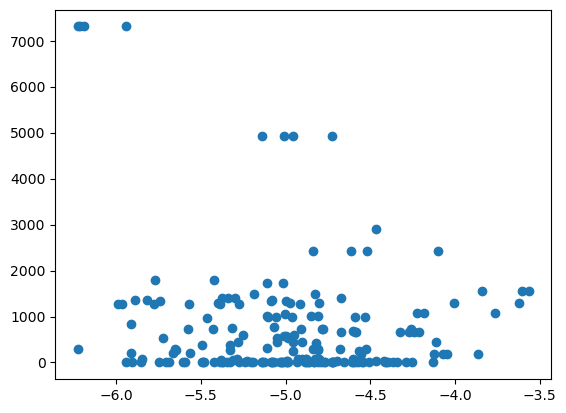

In [20]:
import matplotlib.pyplot as plt
plt.scatter(yhat_native_conf, y_native_conf)
plt.show()

[1494 1494 1300 1300 4921 4921 4921 4921 1276 1276 1276 1276 1021 1021
 1021 1330 2895 7309 7309 7309 7309 1336 1336 1301 1301 1301 1723 1723
 1787 1787 1086 1086 1086 1359 1359 1359 1549 1549 1549 1048 2429 2429
 2429 2429 1275 1275 1275 1401 1401 1401 1401]


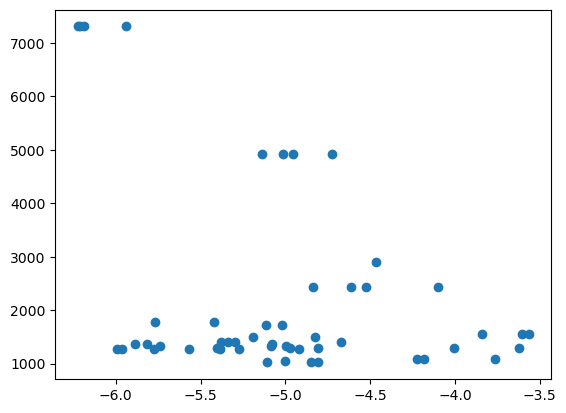

In [12]:
import numpy as np
yhat = np.asarray(yhat_native_conf)
y = np.asarray(y_native_conf)
mask = y > 1000
yhat_masked = yhat[mask]
y_masked = y[mask]
print(y_masked)
plt.scatter(yhat_masked, y_masked)
plt.show()

In [13]:
import scipy.stats as st
r, p = st.pearsonr(yhat_masked, y_masked)
print(r)
print(p)

-0.36488440224642676
0.008472253855315973


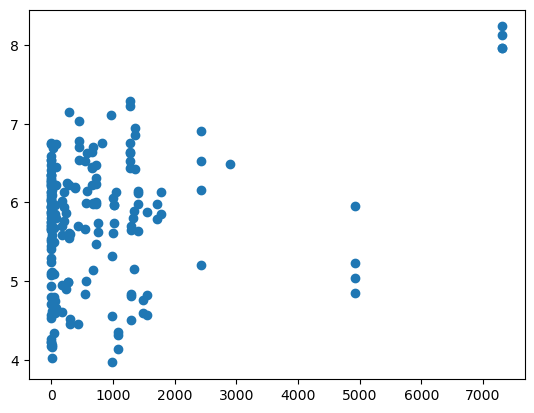

In [31]:
y_df = pd.read_csv('../out/pymol/optimized_and_docked_2g5r_2/kdeep_out_native_conf.csv')
yvals = [float(i) for i in y_df['Pkd mean']]
yhatvals = [float(i) for i in y_native_conf]
plt.scatter(yhatvals, yvals)
plt.show()
    

In [32]:
import scipy.stats as st
r, p = st.pearsonr(yhatvals, yvals)
print(r)
print(p)

0.32285002900819143
4.66611898241739e-06
